In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics  #Additional scklearn functions


import xgboost as xgb
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
X = pd.read_pickle('feature_df.pkl')
y = pd.read_pickle('target.pkl')

In [3]:
X.head()

,IRALCFY,IRMJFY,IRCOCFY,IRCRKFY,IRHERFY,IRHALFY,IRINHFY,IRANLFY,IRTRNFY,IRSTMFY,IRSEDFY,IRCIGFM,CIGYR,CGRYR,SNFYR,ALCYR,CRKYR,SUMYR,IRCIGAGE,IRCGRAGE,IRSNFAGE,IRALCAGE,IRCRKAGE,SUMAGE,DEPNDMRJ,DPILLALC,ABODILAL,TOBFLAG,SNFFLAG,ALCFLAG,CRKFLAG,SUMFLAG,EDUCCAT2,CATAG6,IRSEX,INCOME,NEWRACE2,2,3,4,5,6,7
1,48,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,91.0,0,0,0,1,0,0,991,991,991,18,991,991,0,0,0,0,0,1,0,0,3,5,2,3,1,0,0,0,0,0,0
2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,91.0,0,0,0,0,0,0,991,991,991,991,991,991,0,0,0,0,0,0,0,0,2,2,1,2,1,0,0,0,0,0,0
3,52,144,-1,-2,-2,5,-2,-2,-2,-2,-2,93.0,1,0,0,1,0,1,13,14,991,12,991,14,0,0,1,1,0,1,0,1,3,2,1,1,1,0,0,0,0,0,0
4,260,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,93.0,0,0,0,1,0,0,11,25,991,17,991,991,0,0,0,1,0,1,0,0,4,6,1,4,1,0,0,0,0,0,0
5,24,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,91.0,0,0,0,1,0,0,991,991,991,22,991,991,0,0,0,0,0,1,0,0,2,2,2,1,7,0,0,0,0,0,1


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

Random Forest

In [6]:
clf = RandomForestClassifier(n_jobs=-1, max_depth=25, max_features=25, min_samples_split=5, n_estimators=1000, oob_score=True, class_weight='balanced')
clf.fit(X_train, y_train)
prob = clf.predict_proba(X_test)[:,1]

In [8]:
thr = np.arange(0.01, 0.2, 0.01)
#thr = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1,0.15, 0.2, 0.25, 0.3, 0.35]
recalls = []
precisions = []
y_pred = []

In [10]:
for t in thr:
    y_pred = [1 if x > t else 0 for x in prob]
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recalls.append(recall)
    precisions.append(precision)
    print('for ',t)
    print('recall: ', recall_score(y_test, y_pred))
    print('precision: ', precision_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred).ravel())
    print('f1 score: ', f1_score(y_test, y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    print(metrics.auc(fpr, tpr))

for  0.01
recall:  0.9641185647425897
precision:  0.08904899135446685
[ 547 6322   23  618]
f1 score:  0.1630391768895924
0.5218758495572026
for  0.02
recall:  0.9297971918876755
precision:  0.09190439475713184
[ 980 5889   45  596]
f1 score:  0.16727476845355035
0.5362335792019539
for  0.03
recall:  0.9095163806552262
precision:  0.09576215505913271
[1364 5505   58  583]
f1 score:  0.17327983355624904
0.554044840495032
for  0.04
recall:  0.8814352574102964
precision:  0.09881077299755159
[1716 5153   76  565]
f1 score:  0.17770089636735337
0.5656266402060944
for  0.05
recall:  0.8533541341653667
precision:  0.1026844377698517
[2089 4780   94  547]
f1 score:  0.18331099195710457
0.5787370467012596
for  0.060000000000000005
recall:  0.8252730109204368
precision:  0.10635303578608765
[2424 4445  112  529]
f1 score:  0.18842386464826358
0.5890814028251914
for  0.06999999999999999
recall:  0.797191887675507
precision:  0.11060606060606061
[2760 4109  130  511]
f1 score:  0.1942596464550466

In [11]:
t = 0.07
y_pred = [1 if x > t else 0 for x in prob]

In [12]:
confusion_matrix(y_test, y_pred).ravel()

array([2760, 4109,  130,  511])

In [13]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

Text(0.5,15,'False Positive Rate')

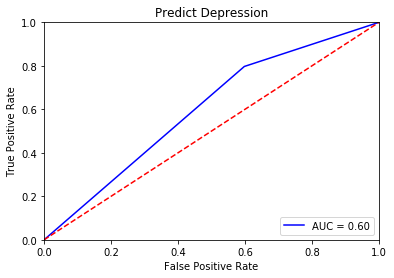

In [14]:
plt.title('Predict Depression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [15]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [16]:
feature_importances.index

Index([ 'IRALCFY', 'IRALCAGE',   'SUMAGE', 'IRCIGAGE',   'INCOME', 'EDUCCAT2',
       'IRCGRAGE',   'CATAG6',  'IRCIGFM',   'IRMJFY',    'IRSEX', 'NEWRACE2',
        'IRANLFY', 'IRSNFAGE', 'ABODILAL', 'DPILLALC',  'IRTRNFY',  'IRHALFY',
        'IRCOCFY',          2,    'CIGYR',  'SUMFLAG',  'IRSTMFY',    'CGRYR',
        'TOBFLAG',  'IRINHFY',          7,    'SUMYR',    'ALCYR', 'IRCRKAGE',
                5,  'SNFFLAG',          6,    'SNFYR',  'IRSEDFY',  'IRHERFY',
        'ALCFLAG',          3,          4,  'IRCRKFY', 'DEPNDMRJ',  'CRKFLAG',
          'CRKYR'],
      dtype='object')

In [17]:
feature_importances

,importance
IRALCFY,0.123127
IRALCAGE,0.098943
SUMAGE,0.077017
IRCIGAGE,0.076878
INCOME,0.055564
EDUCCAT2,0.055195
IRCGRAGE,0.050634
CATAG6,0.050171
IRCIGFM,0.040877
IRMJFY,0.037969


Grid search to find the best class_weight

In [ ]:
weights = np.linspace(0.65, 0.95, 20)

rf_gsearch = GridSearchCV(estimator=clf,
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=3
)
grid_result = rf_gsearch.fit(X_train,y_train)

Random forest with 24 highest featuers from feature importance

In [37]:
reduce_X = pd.read_pickle('reduce_x.pkl')

In [38]:
reduce_X.shape

(37547, 24)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size=0.2)

In [56]:
y_test.shape

(7510,)

In [53]:
clf = RandomForestClassifier(n_jobs=-1, max_depth=10, max_features=5, min_samples_split=5, n_estimators=1000)
clf.fit(X_train, y_train)
prob = clf.predict_proba(X_test)[:,1]

In [54]:
thr = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1,0.15, 0.2, 0.25, 0.3, 0.35]
recalls = []
precisions = []
y_pred = []

In [55]:
for t in thr:
    y_pred = [1 if x > t else 0 for x in prob]
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recalls.append(recall)
    precisions.append(precision)
    print('for ',t)
    print('recall: ', recall_score(y_test, y_pred))
    print('precision: ', precision_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred).ravel())
    print('f1 score: ', f1_score(y_test, y_pred))

for  0.01
recall:  1.0
precision:  0.07696404793608522
[   0 6932    0  578]
f1 score:  0.14292779426310584
for  0.02
recall:  0.9930795847750865
precision:  0.07760951865873444
[ 110 6822    4  574]
f1 score:  0.14396789566089793
for  0.03
recall:  0.9740484429065744
precision:  0.08060128847530422
[ 510 6422   15  563]
f1 score:  0.14888271849795054
for  0.04
recall:  0.9532871972318339
precision:  0.08520179372197309
[1016 5916   27  551]
f1 score:  0.15642299503193755
for  0.05
recall:  0.8719723183391004
precision:  0.09578107183580388
[2174 4758   74  504]
f1 score:  0.1726027397260274
for  0.06
recall:  0.7577854671280276
precision:  0.10952738184546136
[3371 3561  140  438]
f1 score:  0.19139174131527198
for  0.07
recall:  0.6730103806228374
precision:  0.12198181248040138
[4132 2800  189  389]
f1 score:  0.20653039554021765
for  0.08
recall:  0.6193771626297578
precision:  0.12938200216841345
[4523 2409  220  358]
f1 score:  0.214050822122571
for  0.09
recall:  0.5570934256055

Gradient Boosting

In [16]:
X_train.shape

(30037, 43)

In [18]:
gb_gs = GradientBoostingClassifier(n_estimators = 1700, 
                                   learning_rate=0.005, max_depth=7, max_features=9,
                                   min_samples_split=2000, min_samples_leaf=50, subsample=0.85)

In [19]:
gb_gs.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.005, loss='deviance', max_depth=7,
              max_features=9, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=2000,
              min_weight_fraction_leaf=0.0, n_estimators=1700,
              presort='auto', random_state=None, subsample=0.85, verbose=0,
              warm_start=False)

In [20]:
prob = gb_gs.predict_proba(X_test)[:,1]

In [21]:
prob

array([0.09050814, 0.05167885, 0.03853633, ..., 0.03556142, 0.2167762 ,
       0.04063796])

In [22]:
thr = np.arange(0.01, 0.2, 0.01)
#thr = [ 0.02, 0.03, 0.04,0.045, 0.05, 0.06,0.065, 0.07, 0.08, 0.09, 0.1,0.15, 0.2, 0.25]
recalls = []
precisions = []
y_pred = []

In [24]:
for t in thr:
    y_pred = [1 if x > t else 0 for x in prob]
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recalls.append(recall)
    precisions.append(precision)
    print('for ',t)
    print('recall: ', recall_score(y_test, y_pred))
    print('precision: ', precision_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred).ravel())
    print('f1 score: ', f1_score(y_test, y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    print(metrics.auc(fpr, tpr))

for  0.01
recall:  1.0
precision:  0.08536422959115728
[   1 6868    0  641]
f1 score:  0.15730061349693253
0.500072790799243
for  0.02
recall:  0.9953198127925117
precision:  0.08669656203288491
[ 148 6721    3  638]
f1 score:  0.1595
0.5084329446842162
for  0.03
recall:  0.9609984399375975
precision:  0.09316394434361766
[ 873 5996   25  616]
f1 score:  0.16986074727698883
0.5440455877079164
for  0.04
recall:  0.9048361934477379
precision:  0.102184637068358
[1773 5096   61  580]
f1 score:  0.18363147063479499
0.5814761837816649
for  0.05
recall:  0.8471138845553822
precision:  0.11496929917425365
[2689 4180   98  543]
f1 score:  0.2024608501118568
0.6192914014420526
for  0.060000000000000005
recall:  0.765990639625585
precision:  0.12958564264977568
[3571 3298  150  491]
f1 score:  0.2216704288939052
0.6429312639094587
for  0.06999999999999999
recall:  0.6770670826833073
precision:  0.13839285714285715
[4167 2702  207  434]
f1 score:  0.2298120201217898
0.6418528017871334
for  0.08


In [25]:
t= 0.09
y_pred = [1 if x > t else 0 for x in prob]

In [26]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

Text(0.5,15,'False Positive Rate')

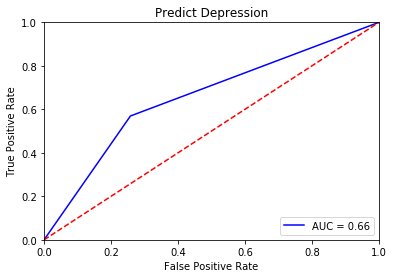

In [27]:
plt.title('Predict Depression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [26]:
feature_importances = pd.DataFrame(gb_gs.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [27]:
feature_importances

,importance
IRTRNFY,0.089030
IRANLFY,0.077969
IRALCFY,0.057943
IRMJFY,0.054940
DPILLALC,0.048721
SUMAGE,0.047201
IRSEX,0.046200
IRCIGAGE,0.045832
IRCOCFY,0.043611
IRALCAGE,0.041117


Adaboost?

In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import AdaBoostClassifier

In [35]:
model = AdaBoostClassifier(n_estimators = 1700, 
                                   learning_rate=0.005, max_depth=7, max_features=9,
                                   min_samples_split=2000, min_samples_leaf=50, subsample=0.85)

TypeError: __init__() got an unexpected keyword argument 'max_depth'

Grid search: tune n_estimators

In [134]:
gb_gs = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, max_features='sqrt',
                                   min_samples_split=300, min_samples_leaf=30, subsample=0.8)

In [135]:
param_test1 = {'n_estimators':range(20,201,10)}
gsearch1 = GridSearchCV(estimator=gb_gs, 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=30, min_samples_split=300,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': range(20, 201, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [136]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_


/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.69210, std: 0.00568, params: {'n_estimators': 20},
  mean: 0.69898, std: 0.00718, params: {'n_estimators': 30},
  mean: 0.70142, std: 0.00477, params: {'n_estimators': 40},
  mean: 0.70132, std: 0.00635, params: {'n_estimators': 50},
  mean: 0.70474, std: 0.00486, params: {'n_estimators': 60},
  mean: 0.70185, std: 0.00626, params: {'n_estimators': 70},
  mean: 0.70348, std: 0.00830, params: {'n_estimators': 80},
  mean: 0.70383, std: 0.00734, params: {'n_estimators': 90},
  mean: 0.70297, std: 0.00690, params: {'n_estimators': 100},
  mean: 0.70157, std: 0.00914, params: {'n_estimators': 110},
  mean: 0.70230, std: 0.00848, params: {'n_estimators': 120},
  mean: 0.70410, std: 0.00693, params: {'n_estimators': 130},
  mean: 0.70143, std: 0.00848, params: {'n_estimators': 140},
  mean: 0.70234, std: 0.00694, params: {'n_estimators': 150},
  mean: 0.70167, std: 0.00873, params: {'n_estimators': 160},
  mean: 0.70155, std: 0.00971, params: {'n_estimators': 170},
  mean: 0.70059,

Grid search: tuning max_depth, min_samples_split

In [152]:
gb_gs = GradientBoostingClassifier(learning_rate=0.1, max_features='sqrt',
                                   min_samples_leaf=30, subsample=0.8)

In [154]:
param_test2 = {'max_depth':range(2,14,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator=gb_gs, 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=30, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': range(5, 16, 2), 'min_samples_split': range(200, 1001, 200)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [155]:
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.70323, std: 0.00804, params: {'max_depth': 5, 'min_samples_split': 200},
  mean: 0.70384, std: 0.00743, params: {'max_depth': 5, 'min_samples_split': 400},
  mean: 0.70246, std: 0.00614, params: {'max_depth': 5, 'min_samples_split': 600},
  mean: 0.70371, std: 0.00717, params: {'max_depth': 5, 'min_samples_split': 800},
  mean: 0.70294, std: 0.00665, params: {'max_depth': 5, 'min_samples_split': 1000},
  mean: 0.70120, std: 0.00875, params: {'max_depth': 7, 'min_samples_split': 200},
  mean: 0.70213, std: 0.00872, params: {'max_depth': 7, 'min_samples_split': 400},
  mean: 0.70076, std: 0.00736, params: {'max_depth': 7, 'min_samples_split': 600},
  mean: 0.70367, std: 0.00784, params: {'max_depth': 7, 'min_samples_split': 800},
  mean: 0.70448, std: 0.00699, params: {'max_depth': 7, 'min_samples_split': 1000},
  mean: 0.69603, std: 0.00869, params: {'max_depth': 9, 'min_samples_split': 200},
  mean: 0.69591, std: 0.00776, params: {'max_depth': 9, 'min_samples_split': 400},
  

Grid search: tuning min_samples_split, min_samples_leaf

In [162]:
gb_gs = GradientBoostingClassifier(n_estimators = 60, 
                                   learning_rate=0.1, max_depth=7, max_features='sqrt',
                                subsample=0.8)

In [163]:
param_test3 = {'min_samples_split':range(800,2100,200), 'min_samples_leaf':range(20,71,10)}
gsearch3 = GridSearchCV(estimator=gb_gs, 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=None, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'min_samples_split': range(800, 2100, 200), 'min_samples_leaf': range(20, 71, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [164]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.70311, std: 0.00760, params: {'min_samples_leaf': 20, 'min_samples_split': 800},
  mean: 0.70070, std: 0.00673, params: {'min_samples_leaf': 20, 'min_samples_split': 1000},
  mean: 0.70510, std: 0.00465, params: {'min_samples_leaf': 20, 'min_samples_split': 1200},
  mean: 0.70516, std: 0.00501, params: {'min_samples_leaf': 20, 'min_samples_split': 1400},
  mean: 0.70442, std: 0.00622, params: {'min_samples_leaf': 20, 'min_samples_split': 1600},
  mean: 0.70437, std: 0.00567, params: {'min_samples_leaf': 20, 'min_samples_split': 1800},
  mean: 0.70277, std: 0.00655, params: {'min_samples_leaf': 20, 'min_samples_split': 2000},
  mean: 0.70446, std: 0.00809, params: {'min_samples_leaf': 30, 'min_samples_split': 800},
  mean: 0.70428, std: 0.00922, params: {'min_samples_leaf': 30, 'min_samples_split': 1000},
  mean: 0.70352, std: 0.00640, params: {'min_samples_leaf': 30, 'min_samples_split': 1200},
  mean: 0.70362, std: 0.00845, params: {'min_samples_leaf': 30, 'min_samples_split

Grid search: tune max_features

In [176]:
gb_gs = GradientBoostingClassifier(n_estimators = 60, 
                                   learning_rate=0.1, max_depth=7,
                                   min_samples_split=2000, min_samples_leaf=50, subsample=0.8)

In [179]:
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator=gb_gs, 
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=2000,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=None, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_features': range(7, 20, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [180]:
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.70300, std: 0.00759, params: {'max_features': 7},
  mean: 0.70412, std: 0.00946, params: {'max_features': 9},
  mean: 0.70325, std: 0.00693, params: {'max_features': 11},
  mean: 0.70256, std: 0.00796, params: {'max_features': 13},
  mean: 0.70277, std: 0.00834, params: {'max_features': 15},
  mean: 0.70359, std: 0.00720, params: {'max_features': 17},
  mean: 0.70229, std: 0.00729, params: {'max_features': 19}],
 {'max_features': 9},
 0.7041176825808726)

Grid search: tune subsample

In [5]:
gb_gs = GradientBoostingClassifier(n_estimators = 60, 
                                   learning_rate=0.1, max_depth=7, max_features=9,
                                   min_samples_split=2000, min_samples_leaf=50)

In [6]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator=gb_gs, 
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=9, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=2000,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [7]:
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.70232, std: 0.00769, params: {'subsample': 0.6},
  mean: 0.70415, std: 0.00905, params: {'subsample': 0.7},
  mean: 0.70395, std: 0.00637, params: {'subsample': 0.75},
  mean: 0.70412, std: 0.00556, params: {'subsample': 0.8},
  mean: 0.70605, std: 0.00706, params: {'subsample': 0.85},
  mean: 0.70339, std: 0.00599, params: {'subsample': 0.9}],
 {'subsample': 0.85},
 0.7060501503379315)

In [36]:
gb_gs = GradientBoostingClassifier(n_estimators = 1700, 
                                   learning_rate=0.005, max_depth=7, max_features=9,
                                   min_samples_split=2000, min_samples_leaf=50, subsample=0.85)

In [ ]:
param_test6 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}
gsearch6 = GridSearchCV(estimator=gb_gs, 
param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(X_train,y_train)